In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

In [2]:
mnist = MNIST('./data')
images, labels = mnist.load_training()

labels = np.array(labels)
images = np.array(images).astype('float32') / 255
images2d = images.reshape([-1, 28, 28])

In [3]:
def batch(data, index, batch_size):
    offset = batch_size * index
    return data[offset:offset + batch_size]

5


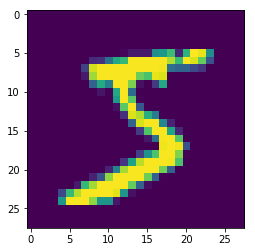

0


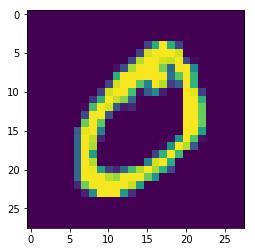

4


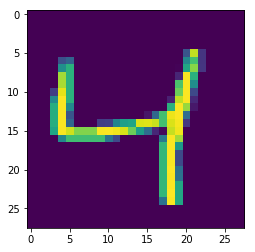

1


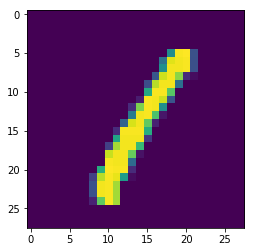

9


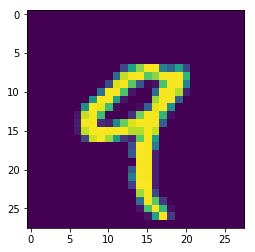

In [4]:
for i in range(5):
    print(labels[i])
    plt.imshow(images2d[i])
    plt.show()

In [5]:
x = tf.placeholder(tf.float32, [None, 28, 28])
z = tf.placeholder(tf.int64, [None])
keep_prob = tf.placeholder(tf.float32)

In [6]:
c1_k = 16
c2_k = 32
fc_k = 1024

In [7]:
input = tf.reshape(x, [-1, 28, 28, 1])

# Helpers

def conv(x, w, b):
    return tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding='SAME') + b

def pool(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Convolution/Polling Layer 1

c1_w = tf.Variable(tf.truncated_normal([5, 5, 1, c1_k], stddev=0.1))
c1_b = tf.Variable(tf.truncated_normal([c1_k], stddev=0.1))
c1_y = tf.nn.relu(conv(input, c1_w, c1_b))

p1_y = pool(c1_y)

# Convolution/Polling Layer 2

c2_w = tf.Variable(tf.truncated_normal([5, 5, c1_k, c2_k], stddev=0.1))
c2_b = tf.Variable(tf.truncated_normal([c2_k], stddev=0.1))
c2_y = tf.nn.relu(conv(p1_y, c2_w, c2_b))

p2_y = pool(c2_y)

In [8]:
p1_y.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(16)])

In [9]:
p2_y.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(32)])

In [10]:
# Fully Connected

fc_size = (28 // 4) * (28 // 4) * c2_k
fc_y = tf.reshape(p2_y, [-1, fc_size])

In [11]:
fc_y.shape

TensorShape([Dimension(None), Dimension(1568)])

In [12]:
# Hidden Layer

w1 = tf.Variable(tf.truncated_normal([fc_size, fc_k], stddev=0.1))
b1 = tf.Variable(tf.truncated_normal([fc_k], stddev=0.1))
y1 = tf.nn.relu(tf.matmul(fc_y, w1) + b1)

drop_y = tf.nn.dropout(y1, keep_prob)

# Ouput Layer

w = tf.Variable(tf.truncated_normal([fc_k, 10], stddev=0.1))
b = tf.Variable(tf.truncated_normal([10], stddev=0.1))
y = tf.nn.softmax(tf.matmul(drop_y, w) + b)

In [13]:
y.shape

TensorShape([Dimension(None), Dimension(10)])

In [14]:
t = tf.one_hot(z, 10)

cross_entropy = -tf.reduce_sum(t * tf.log(y), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.AdamOptimizer(0.001).minimize(loss)

In [15]:
correct = tf.equal(tf.argmax(y, axis=1), z)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [16]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: images2d[:1000],
    z: labels[:1000],
    keep_prob: 1.0
}

batch_size = 100

print(session.run(accuracy, feed_dict=test_data))

for i in range(100):
    data = {
        x: batch(images2d[1000:], i, batch_size),
        z: batch(labels[1000:], i, batch_size),
        keep_prob: 0.5
    }
    session.run(train, feed_dict=data)
    print(i + 1, session.run(accuracy, feed_dict=test_data))

0.113
1 0.197
2 0.239
3 0.256
4 0.455
5 0.509
6 0.614
7 0.571
8 0.541
9 0.612
10 0.711
11 0.762
12 0.76
13 0.747
14 0.739
15 0.735
16 0.744
17 0.786
18 0.817
19 0.826
20 0.835
21 0.846
22 0.846
23 0.838
24 0.846
25 0.861
26 0.869
27 0.874
28 0.872
29 0.862
30 0.859
31 0.861
32 0.863
33 0.873
34 0.879
35 0.887
36 0.882
37 0.883
38 0.878
39 0.871
40 0.879
41 0.894
42 0.902
43 0.901
44 0.9
45 0.888
46 0.884
47 0.884
48 0.893
49 0.896
50 0.904
51 0.904
52 0.905
53 0.906
54 0.909
55 0.907
56 0.901
57 0.901
58 0.901
59 0.9
60 0.903
61 0.904
62 0.915
63 0.919
64 0.922
65 0.927
66 0.933
67 0.93
68 0.933
69 0.929
70 0.927
71 0.928
72 0.927
73 0.919
74 0.919
75 0.923
76 0.925
77 0.923
78 0.929
79 0.934
80 0.94
81 0.941
82 0.943
83 0.946
84 0.943
85 0.943
86 0.944
87 0.945
88 0.945
89 0.947
90 0.941
91 0.935
92 0.935
93 0.943
94 0.943
95 0.938
96 0.936
97 0.929
98 0.925
99 0.929
100 0.934


4 9


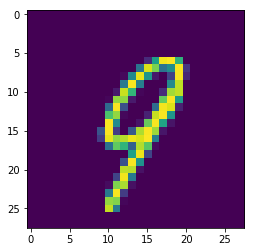

7 2


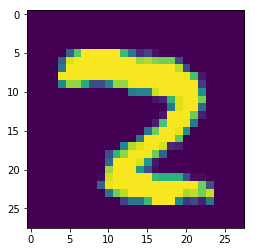

7 9


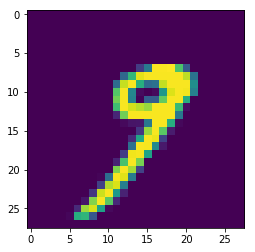

5 9


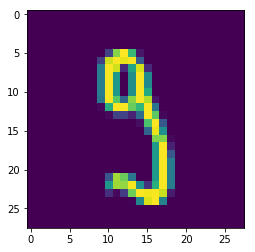

In [17]:
predictions = session.run(tf.argmax(y, axis=1), feed_dict=test_data)

for i in range(50):
    if predictions[i] != labels[i]:
        print(predictions[i], labels[i])
        plt.imshow(images2d[i])
        plt.show()